# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
!pip install citipy

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"
cities = pd.read_csv(output_data_file)

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

cities_df = pd.DataFrame(cities)
cities_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


## Generate Cities List

In [3]:
# # List for holding lat_lngs and cities
# lat_lngs = []
# cities = []

# # Create a set of random lat and lng combinations
# lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
# lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
# lat_lngs = zip(lats, lngs)

# # Identify nearest city for each lat, lng combination
# for lat_lng in lat_lngs:
#     city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
#     # If the city is unique, then add it to a our cities list
#     if city not in cities:
#         cities.append(city)

# # Print the city count to confirm sufficient count
# len(cities)

lat= []
lng= []
cities= []

for each_city in cities_df["City"]:
    cities.append(each_city)
    
cities

for each_lat in cities_df["Lat"]:
    lat.append(each_lat)
    
lat

for each_lng in cities_df["Lng"]:
    lng.append(each_lng)

lng

[39.51,
 57.7,
 -69.36,
 112.04,
 18.42,
 -139.03,
 150.85,
 13.84,
 128.87,
 28.91,
 111.51,
 -73.76,
 -159.78,
 114.09,
 -104.67,
 -73.75,
 121.63,
 -68.31,
 57.76,
 99.18,
 92.31,
 115.35,
 -2.56,
 -35.22,
 -105.12,
 99.52,
 81.7,
 -70.91,
 -134.97,
 147.06,
 18.97,
 120.35,
 -127.42,
 150.17,
 114.02,
 -161.76,
 -90.19,
 5.65,
 33.6,
 -60.77,
 19.24,
 -52.73,
 -114.38,
 24.73,
 -90.35,
 -84.4,
 45.06,
 -74.98,
 26.89,
 123.7,
 -94.76,
 -67.52,
 60.78,
 -109.91,
 -149.33,
 102.47,
 -76.2,
 82.74,
 -15.21,
 117.47,
 -84.36,
 123.37,
 -97.86,
 170.27,
 -45.24,
 166.44,
 80.55,
 81.12,
 -7.87,
 -1.13,
 -46.0,
 -51.19,
 172.79,
 -75.98,
 48.53,
 22.34,
 -59.33,
 134.96,
 17.12,
 83.59,
 174.87,
 138.6,
 59.53,
 -3.53,
 148.16,
 147.14,
 30.79,
 49.05,
 -50.22,
 120.72,
 -70.77,
 -59.05,
 102.25,
 -121.81,
 44.22,
 63.02,
 168.86,
 134.5,
 93.76,
 -60.23,
 131.25,
 -76.48,
 -131.65,
 -159.32,
 11.91,
 120.73,
 -155.08,
 -135.06,
 -12.5,
 10.6,
 -120.46,
 92.75,
 20.04,
 72.93,
 164.28,
 

In [4]:
#  api.openweathermap.org/data/2.5/weather?q={city name}&appid={your api key}
query_url= f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

# response=requests.get(query_url + str((cities)[1]))
# pprint(response.json())

lat=[]
long=[]
temp=[]
humid=[]
clouds=[]
wind=[]

for each_city in cities:
    response=requests.get(query_url + str(each_city)).json()
    lat.append(response["coord"]["lat"])
    long.append(response["coord"]["lon"])
    temp.append(response["main"]["temp"])
    humid.append(response["main"]["humidity"])
    clouds.append(response["clouds"]["all"])
    wind.append(response["wind"]["speed"])
    print(f"{each_city} completed")

ostrovnoy completed
mahebourg completed
qaanaaq completed
zhuhai completed
cape town completed
atuona completed
flinders completed
opuwo completed
tiksi completed
pushkinskiye gory completed
aykhal completed
castro completed
avarua completed
saskylakh completed
constitucion completed
albany completed
vilyuysk completed
ushuaia completed
bambous virieux completed
kodinsk completed
teknaf completed
busselton completed
ambon completed
maragogi completed
fallon completed
kantang completed
colonelganj completed
punta arenas completed
rikitea completed
new norfolk completed
gobabis completed
qingdao completed
port hardy completed
arman completed
mamakan completed
bethel completed
clinton completed
varhaug completed
ayan completed
mayor pablo lagerenza completed
hermanus completed
torbay completed
yellowknife completed
kruisfontein completed
puerto ayora completed
rosita completed
beloha completed
port elizabeth completed
port alfred completed
garchitorena completed
kodiak completed
mar del p

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create Weather data frame

city_weather = pd.DataFrame({
    "City": cities,
    "Latitude": lat,
    "Longitude": long,
    "Temperature (F)": temp,
    "Humidity": humid,
    "Clouds": clouds,
    "Wind Speed (mph)": wind
})

city_weather.head()

,City,Latitude,Longitude,Temperature (F),Humidity,Clouds,Wind Speed (mph)
0,ostrovnoy,68.05,39.51,47.64,94,100,4.74
1,mahebourg,-20.41,57.70,69.80,77,75,10.29
2,qaanaaq,77.48,-69.36,21.06,78,36,9.86
3,zhuhai,22.28,113.57,84.81,83,40,6.93
4,cape town,-33.93,18.42,53.78,87,75,5.82


In [6]:
# Write data frame to csv file

city_weather.to_csv("C:/Users/bbahaneb/Documents/DU Data Bootcamp/Data Bootcamp Homework/data-homework/Python API/Python Api Challenge/WeatherPycityweather.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

No cities had humidity over 100% in this data set

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

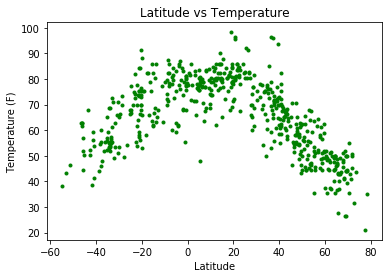

The temperature is higher around the equator.


In [7]:
plt.scatter(city_weather["Latitude"], city_weather["Temperature (F)"], marker='.', color='g')
plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.show()
print("The temperature is higher around the equator.")

## Latitude vs. Humidity Plot

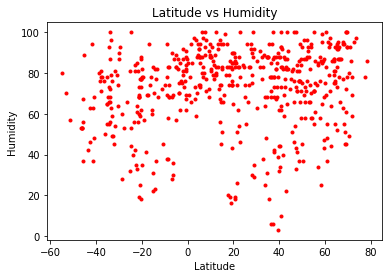

This plot shows that the correlation between latitude and humidity is somewhat strong around the equator, but overall there is not much correlation.  Humidity seems to be higher around the equator.


In [8]:
plt.scatter(city_weather["Latitude"], city_weather["Humidity"], marker='.', color='r')
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()
print("This plot shows that the correlation between latitude and humidity is somewhat strong around the equator, but overall there is not much correlation.  Humidity seems to be higher around the equator.")

## Latitude vs. Cloudiness Plot

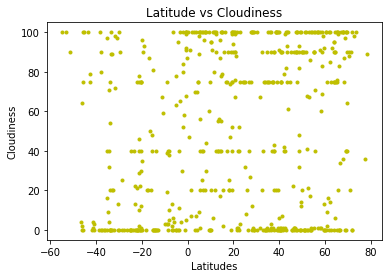

The data is too scattered to find any real correlation.


In [9]:
plt.scatter(city_weather["Latitude"], city_weather["Clouds"], marker='.', color='y')
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitudes")
plt.ylabel("Cloudiness")
plt.show()
print("The data is too scattered to find any real correlation.")

## Latitude vs. Wind Speed Plot

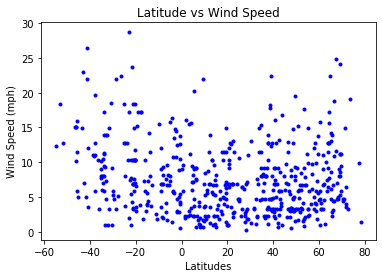

Many cities in the northern hemisphere experience +20mph wind speeds.


In [10]:
plt.scatter(city_weather["Latitude"], city_weather["Wind Speed (mph)"], marker='.', color='b')
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitudes")
plt.ylabel("Wind Speed (mph)")
plt.show()
print("Many cities in the northern hemisphere experience +20mph wind speeds.")

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots

In [12]:
# Create Northern and Southern Hemisphere DataFrames
north=city_weather.loc[city_weather["Latitude"]>=0, :]
north=pd.DataFrame(north)
north.head()

south=city_weather.loc[city_weather["Latitude"]<0, :]
south=pd.DataFrame(south)
south.head()

# Gather Northern and Southern Hemisphere data

# Northern

n_cities=[]
n_lat=[]
n_long=[]
n_temps=[]
n_humid=[]
n_clouds=[]
n_wind=[]


for each_city in cities:
    response=requests.get(query_url + str(each_city)).json()
    if response["coord"]["lat"]>=0:
        n_cities.append(response["name"])
        n_lat.append(response["coord"]["lat"])
        n_long.append(response["coord"]["lon"])
        n_temps.append(response["main"]["temp_max"])
        n_humid.append(response["main"]["humidity"])
        n_clouds.append(response["clouds"]["all"])
        n_wind.append(response["wind"]["speed"])
        

n_df= pd.DataFrame({
    "City": n_cities,
    "Latitude": n_lat,
    "Longitude": n_long,
    "Max Temperature": n_temps,
    "Humidity": n_humid,
    "Clouds": n_clouds,
    "Wind Speed": n_wind
})

n_df.head()



,City,Latitude,Longitude,Max Temperature,Humidity,Clouds,Wind Speed
0,Ostrovnoy,68.05,39.51,47.64,94,100,4.74
1,Qaanaaq,77.48,-69.36,21.06,78,36,9.86
2,Zhuhai,22.28,113.57,86.00,83,40,6.93
3,Tiksi,71.69,128.87,45.37,78,0,3.60
4,Pushkinskiye Gory,57.02,28.91,51.62,85,100,8.32


In [13]:
# Southern

s_cities=[]
s_lat=[]
s_long=[]
s_temps=[]
s_humid=[]
s_clouds=[]
s_wind=[]


for each_city in cities:
    response=requests.get(query_url + str(each_city)).json()
    if response["coord"]["lat"]<0:
        s_cities.append(response["name"])
        s_lat.append(response["coord"]["lat"])
        s_long.append(response["coord"]["lon"])
        s_temps.append(response["main"]["temp_max"])
        s_humid.append(response["main"]["humidity"])
        s_clouds.append(response["clouds"]["all"])
        s_wind.append(response["wind"]["speed"])
        

s_df= pd.DataFrame({
    "City": s_cities,
    "Latitude": s_lat,
    "Longitude": s_long,
    "Max Temperature": s_temps,
    "Humidity": s_humid,
    "Clouds": s_clouds,
    "Wind Speed": s_wind
})

s_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Clouds,Wind Speed
0,Mahébourg,-20.41,57.70,69.8,77,75,10.29
1,Cape Town,-33.93,18.42,55.0,87,75,5.82
2,Atuona,-9.80,-139.03,78.8,74,3,15.46
3,Flinders,-34.58,150.86,75.0,55,40,8.05
4,Opuwo,-18.06,13.84,58.1,41,0,3.91


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

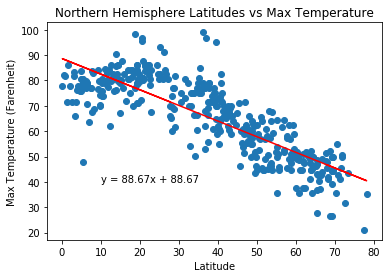

The cities furthest from the equator have the lowest temperatures.


In [14]:
from scipy.stats import linregress


plt.scatter(n_df["Latitude"], n_df["Max Temperature"])


x_values=n_df["Latitude"]
y_values=n_df["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq= "y = " + str(round(intercept, 2)) + "x + " +str(round(intercept, 2))
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (10, 40))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Farenheit)")
plt.title("Northern Hemisphere Latitudes vs Max Temperature")
plt.savefig("n_temps.png")
plt.show()
print("The cities furthest from the equator have the lowest temperatures.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

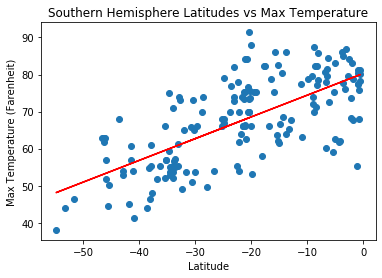

The cities closest to the equator have the highest temperatures.


In [15]:
plt.scatter(s_df["Latitude"], s_df["Max Temperature"])


x_values=s_df["Latitude"]
y_values=s_df["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq= "y = " + str(round(intercept, 2)) + "x + " +str(round(intercept, 2))
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (-20, 35))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Farenheit)")
plt.title("Southern Hemisphere Latitudes vs Max Temperature")
plt.savefig("s_temps.png")
plt.show()
print("The cities closest to the equator have the highest temperatures.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

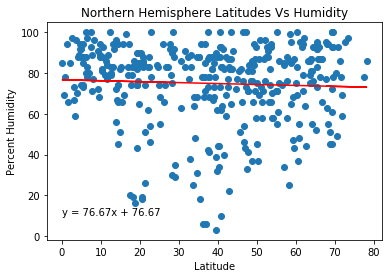

No significant correlation between change in humidity based off of change in latitude.


In [16]:
plt.scatter(n_df["Latitude"], n_df["Humidity"])


x_values=n_df["Latitude"]
y_values=n_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq= "y = " + str(round(intercept, 2)) + "x + " +str(round(intercept, 2))
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (0, 10))
plt.xlabel("Latitude")
plt.ylabel("Percent Humidity")
plt.title("Northern Hemisphere Latitudes Vs Humidity")
plt.savefig("n_humidity.png")
plt.show()
print("No significant correlation between change in humidity based off of change in latitude.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

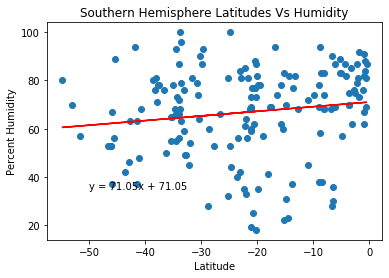

There is a slight increase in humidity as you approach the equator


In [22]:
plt.scatter(s_df["Latitude"], s_df["Humidity"])


x_values=s_df["Latitude"]
y_values=s_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq= "y = " + str(round(intercept, 2)) + "x + " +str(round(intercept, 2))
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (-50, 35))
plt.xlabel("Latitude")
plt.ylabel("Percent Humidity")
plt.title("Southern Hemisphere Latitudes Vs Humidity")
plt.savefig("southern_humidity.png")
plt.show()
print('There is a slight increase in humidity as you approach the equator')

Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

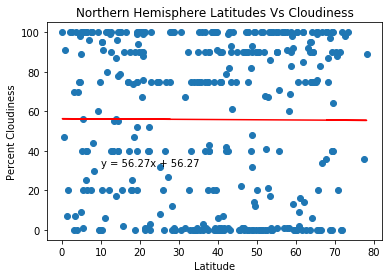

There is no significant change in cloudiness when there is a change in latitude.


In [35]:
plt.scatter(n_df["Latitude"], n_df["Clouds"])


x_values=n_df["Latitude"]
y_values=n_df["Clouds"]
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq= "y = " + str(round(intercept, 2)) + "x + " +str(round(intercept, 2))
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (10, 32))
plt.xlabel("Latitude")
plt.ylabel("Percent Cloudiness")
plt.title("Northern Hemisphere Latitudes Vs Cloudiness")
plt.savefig("northern_cloudiness.png")
plt.show()
print('There is no significant change in cloudiness when there is a change in latitude.')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

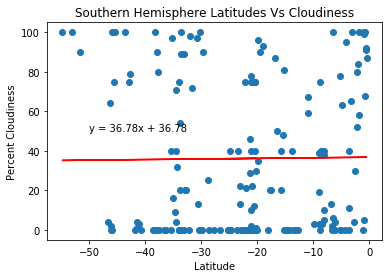

There is no significant change in cloudiness when there is a change in latitude.


In [27]:
plt.scatter(s_df["Latitude"], s_df["Clouds"])


x_values=s_df["Latitude"]
y_values=s_df["Clouds"]
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq= "y = " + str(round(intercept, 2)) + "x + " +str(round(intercept, 2))
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (-50, 50))
plt.xlabel("Latitude")
plt.ylabel("Percent Cloudiness")
plt.title("Southern Hemisphere Latitudes Vs Cloudiness")
plt.savefig("southern_cloudiness.png")
plt.show()
print('There is no significant change in cloudiness when there is a change in latitude.')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

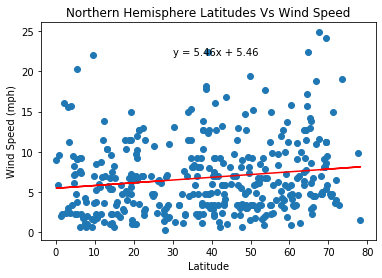

There is no significant correlation between wind speed and change in latitude.


In [32]:
plt.scatter(n_df["Latitude"], n_df["Wind Speed"])


x_values=n_df["Latitude"]
y_values=n_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq= "y = " + str(round(intercept, 2)) + "x + " +str(round(intercept, 2))
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (30, 22))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere Latitudes Vs Wind Speed")
plt.savefig("northern_windspeed.png")
plt.show()
print('There is no significant correlation between wind speed and change in latitude.')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

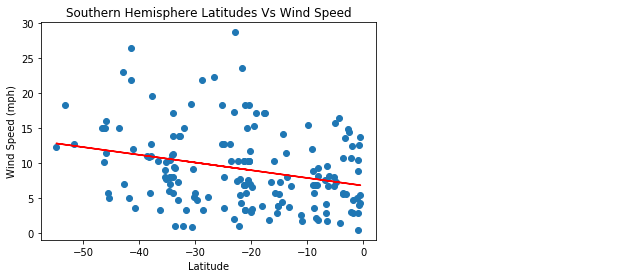

There is a slight correlation between wind speed and change in latidude.


In [34]:
plt.scatter(s_df["Latitude"], s_df["Wind Speed"])


x_values=s_df["Latitude"]
y_values=s_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq= "y = " + str(round(intercept, 2)) + "x + " +str(round(intercept, 2))
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (30, 22))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere Latitudes Vs Wind Speed")
plt.savefig("southern_windspeed.png")
plt.show()
print('There is a slight correlation between wind speed and change in latidude.')